In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

In [2]:
import numpy as np

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

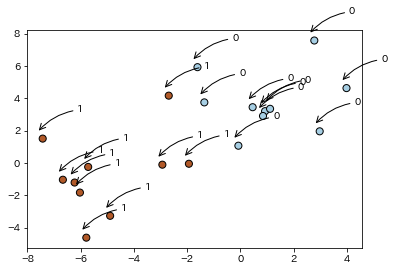

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット
for l, dx, dy in zip(y, X[:,0], X[:, 1]):
    plt.annotate(l, xy=(dx-0.2, dy+0.4), xytext=(40, 20), textcoords='offset points',
                arrowprops = dict(arrowstyle='->, head_length=0.6, head_width=0.3', connectionstyle= 'arc3, rad=.2'))

In [4]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict', clim=(None, None)):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: # 'value', 'probability'
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else:
            if type == "probability":
                Z = 1 / (1 + np.exp(-Z)) # sigmoid
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()
            plt.clim(clim[0], clim[1]) # clim とは ?

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

[[-1.15133594 -0.63085376]] [-0.23482143]


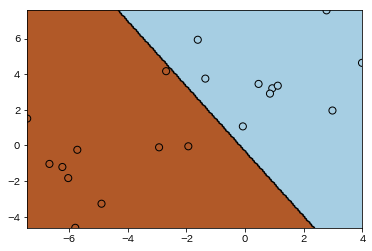

In [6]:
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k',) # 2次元散布図でプロット

plotBoundary(X, clf) # 境界線の描画
print(clf.coef_, clf.intercept_)  # ランダム性はない

ランダム性はない。なぜ?

`random_state` はSGDのためのデータのとる順番を指定するためのもの.

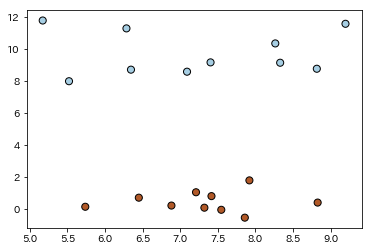

In [8]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=8   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

In [10]:
np.random.randn(2)

array([ 0.17060897, -0.27448369])

[[ 0.59433153 -0.9687889 ]] [ 0.09633605]


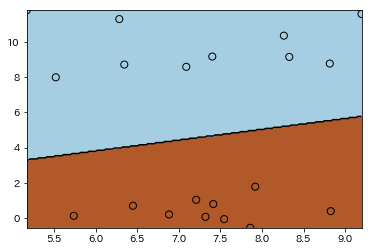

In [14]:
clf = LogisticRegression(warm_start=True)
clf.coef_ = np.random.randn(2)
clf.intercept_ = np.random.rand(1)
clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
print(clf.coef_, clf.intercept_)

`warm_True` としても`coef_, intercept_`に変化なし.　なぜ？

 おそらく、自分がわからないような、すごい損失最小化のアルゴリズムがあり
 
 ほぼ確実に損失最小にする`coef_, intercept_`が求めれると推定する.
 つまり、局所解ではなく大域解(最小値)や局所最適解が求めれる.
 そのため、`coef_, intercept_`が一意に定まる。

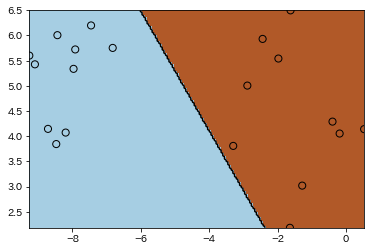

In [15]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=7   # 乱数種（再現用）
                 )

clf = LogisticRegression()

clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

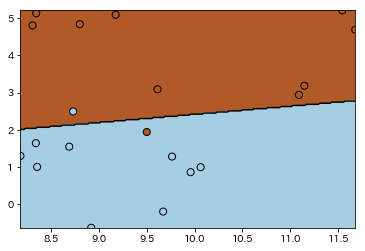

In [16]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=4   # 乱数種（再現用）
                 )

clf = LogisticRegression()

clf.fit(X,y)

plotBoundary(X, clf)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

In [17]:
from IPython.display import HTML
HTML('<iframe scrolling="no" src="https://www.geogebra.org/material/iframe/id/Nc8s96Sc/width/903/height/549/border/888888/sri/true/sdz/true" width="903px" height="549px" style="border:0px;"> </iframe>')

In [18]:
from IPython.display import HTML
HTML('<iframe scrolling="no" src="https://www.geogebra.org/material/iframe/id/Ge9pjBJU/width/930/height/450/border/888888/sri/true/sdz/true" width="930px" height="450px" style="border:0px;"> </iframe>')

In [19]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [20]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
X_train, X_test

(array([[  1.00500000e+01,   1.75300000e+01,   6.44100000e+01, ...,
           6.49900000e-02,   2.89400000e-01,   7.66400000e-02],
        [  1.08000000e+01,   2.19800000e+01,   6.87900000e+01, ...,
           7.48500000e-02,   2.96500000e-01,   7.66200000e-02],
        [  1.61400000e+01,   1.48600000e+01,   1.04300000e+02, ...,
           1.12900000e-01,   2.77800000e-01,   7.01200000e-02],
        ..., 
        [  9.43600000e+00,   1.83200000e+01,   5.98200000e+01, ...,
           5.05200000e-02,   2.45400000e-01,   8.13600000e-02],
        [  9.72000000e+00,   1.82200000e+01,   6.07300000e+01, ...,
           0.00000000e+00,   1.90900000e-01,   6.55900000e-02],
        [  1.15100000e+01,   2.39300000e+01,   7.45200000e+01, ...,
           9.65300000e-02,   2.11200000e-01,   8.73200000e-02]]),
 array([[  1.34000000e+01,   2.05200000e+01,   8.86400000e+01, ...,
           2.05100000e-01,   3.58500000e-01,   1.10900000e-01],
        [  1.32100000e+01,   2.52500000e+01,   8.41000000e+0

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test

(array([[  1.00500000e+01,   1.75300000e+01,   6.44100000e+01, ...,
           6.49900000e-02,   2.89400000e-01,   7.66400000e-02],
        [  1.08000000e+01,   2.19800000e+01,   6.87900000e+01, ...,
           7.48500000e-02,   2.96500000e-01,   7.66200000e-02],
        [  1.61400000e+01,   1.48600000e+01,   1.04300000e+02, ...,
           1.12900000e-01,   2.77800000e-01,   7.01200000e-02],
        ..., 
        [  9.43600000e+00,   1.83200000e+01,   5.98200000e+01, ...,
           5.05200000e-02,   2.45400000e-01,   8.13600000e-02],
        [  9.72000000e+00,   1.82200000e+01,   6.07300000e+01, ...,
           0.00000000e+00,   1.90900000e-01,   6.55900000e-02],
        [  1.15100000e+01,   2.39300000e+01,   7.45200000e+01, ...,
           9.65300000e-02,   2.11200000e-01,   8.73200000e-02]]),
 array([[  1.34000000e+01,   2.05200000e+01,   8.86400000e+01, ...,
           2.05100000e-01,   3.58500000e-01,   1.10900000e-01],
        [  1.32100000e+01,   2.52500000e+01,   8.41000000e+0

In [22]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296

In [23]:
#clf.C = 1e-3
#clf.fit(X_train, y_train)

clf.set_params(C=1e-3).fit(X_train, y_train)
clf.score(X_test, y_test)

0.93859649122807021

In [24]:
clf

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [26]:
X_test_value = clf.decision_function(X_test)

In [27]:
X_test_value

array([ -4.84353774,   3.46423586,   6.15386541,   1.4947256 ,
         9.43175058,   5.81537068,   4.92769146,   6.4087769 ,
         3.33450507,   8.45993264,   0.44779723,   1.66401893,
         5.52621651,  -1.17704977,   1.40199293,  -4.74595354,
         4.16638718, -20.29359312,  -6.44336186, -26.743185  ,
       -10.28270837,  -2.31720408,   6.3802654 ,   4.49088485,
        -4.91729723,   4.55086726,   6.27632798,  -1.51493675,
         5.72072653, -24.08471852,   7.93488362, -17.83132392,
         0.56076024,  -7.52410543,   8.56208151,  -6.51253687,
         2.500099  , -13.15983753,   5.45619283,  -7.95307531,
        -2.83568456,   5.44340126,  -6.16913709,   7.0310384 ,
        -2.58893164, -27.70510985,   8.09883565,   3.53251158,
         6.71547429,  -7.98815427, -12.49963666,  -0.66426945,
       -14.79070751,   5.44489176,   4.76182968,   6.96955362,
         4.21474365,   3.74632729,   4.06625195, -38.53696456,
        -4.17871306,  -9.8518854 ,   6.16009071,   5.34

`decision_function` は \\[\boldsymbol{w}^T\boldsymbol{x} + b\\] の値を示している。
ただし、$\boldsymbol{w} = \{w_1, \dots, w_d\}, \boldsymbol{x} = \{x_1, \dots, x_d\}$

`decision_function < 0` クラス０, `decision_function > 0` クラス１

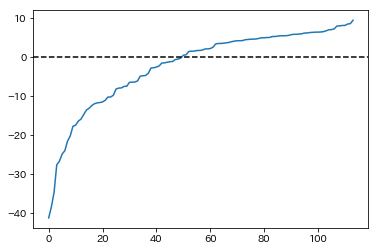

In [35]:
plt.plot(np.sort(X_test_value))
#plt.plot([0, 120], [0, 0], linestyle='--')
plt.axhline(linestyle='--', color='k') # Add a horizontal line across the axis.

クラス０には識別境界から大きく離れている？のがある

(0, 1)

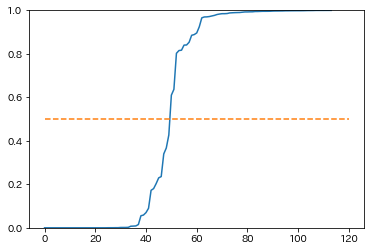

In [36]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(np.sort(sigmoid(X_test_value)))

plt.plot([0, 120], [0.5, 0.5], linestyle='--')
plt.ylim(0,1)

上の図はシグモイド関数に決定関数の値を代入することにより、　クラス１に識別される確率を表している。

`predict_proba()` と同じことをしている。

In [47]:
X_test_value = clf.predict_proba(X_test)
X_test_value, X_test_value.sum(axis=1)

(array([[  9.92182465e-01,   7.81753496e-03],
        [  3.03471396e-02,   9.69652860e-01],
        [  2.12074380e-03,   9.97879256e-01],
        [  1.83213501e-01,   8.16786499e-01],
        [  8.01323661e-05,   9.99919868e-01],
        [  2.97251281e-03,   9.97027487e-01],
        [  7.19111847e-03,   9.92808882e-01],
        [  1.64432949e-03,   9.98355671e-01],
        [  3.44062465e-02,   9.65593754e-01],
        [  2.11741493e-04,   9.99788259e-01],
        [  3.89884621e-01,   6.10115379e-01],
        [  1.59223241e-01,   8.40776759e-01],
        [  3.96523710e-03,   9.96034763e-01],
        [  7.64416930e-01,   2.35583070e-01],
        [  1.97500054e-01,   8.02499946e-01],
        [  9.91388035e-01,   8.61196471e-03],
        [  1.52713563e-02,   9.84728644e-01],
        [  9.99999998e-01,   1.53675449e-09],
        [  9.98411479e-01,   1.58852138e-03],
        [  1.00000000e+00,   2.42986600e-12],
        [  9.99965781e-01,   3.42185526e-05],
        [  9.10291886e-01,   8.970

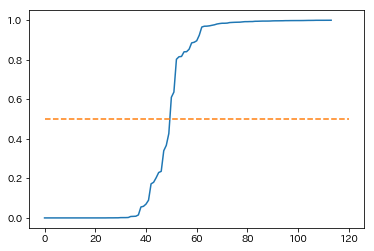

In [48]:
plt.plot(np.sort(X_test_value[:, 1])) # X_test_value[:, 1] は i 番目のデータがクラス1に属する確率を示している。
plt.plot([0, 120], [0.5, 0.5], linestyle='--')

In [88]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, type='predict', clim=(None, None)):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    if type == 'predict':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: # 'value', 'probability'
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        if type == 'predict':
            plt.pcolormesh(XX, YY, Z, zorder=-10)
        else: # 'value', 'probability'
            if type == "probability":
                Z = 1 / (1 + np.exp(-Z)) # sigmoid
            plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=plt.cm.bwr)
            plt.colorbar()
            plt.clim(clim[0], clim[1]) # clim カラーバーの値を制限している ?

    if boundary:
        level = [0]
        if type == "probability":
            level = [0.5]
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=level)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

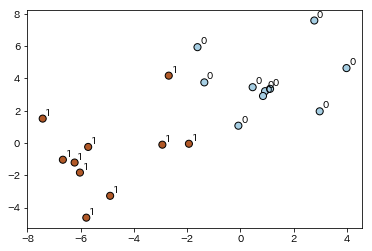

In [84]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット
for text, dx, dy in zip(y, X[:, 0], X[:, 1]):
    plt.annotate(text, xy=(dx+0.1, dy+0.2))

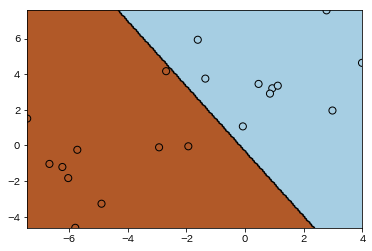

In [50]:
clf = LogisticRegression()

clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf) # 境界線の描画

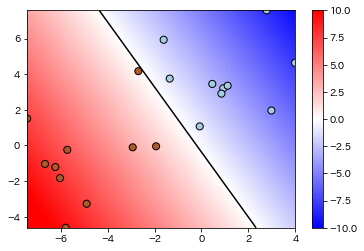

In [56]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="value", clim=(-10, 10))

3.3536016231603138

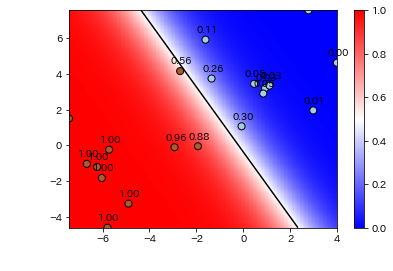

In [89]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k') # 2次元散布図でプロット

plotBoundary(X, clf, type="probability",clim=(0, 1))# 今度は決定関数を代入したシグモイド関数の値をだす。

X_value = clf.decision_function(X)

for l, dx, dy in zip(X_value, X[:,0], X[:, 1]):
    plt.annotate("{0:.2f}".format(sigmoid(l)), xy=(dx-0.4, dy+0.4))
#plt.text(s='hoge', x=0,y=0)

annotateはクラス1（赤）に属する確率を表している。

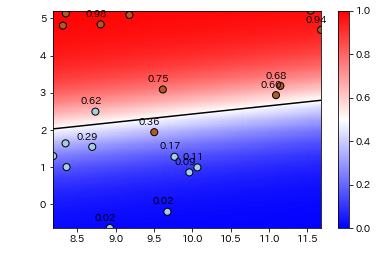

In [90]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=4   # 乱数種（再現用）
                 )

clf = LogisticRegression()

clf.fit(X,y)
   
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

X_value = clf.decision_function(X)

plotBoundary(X, clf, type="probability", clim=(0, 1))

for l, dx, dy in zip(X_value, X[:,0], X[:, 1]):
    plt.annotate("{0:.2f}".format(sigmoid(l)), xy=(dx-0.2, dy+0.2))